In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family'] = 'NanumGothic'
import tqdm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans,DBSCAN
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.decomposition import PCA

2023-08-24 11:06:04.412941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 11:06:04.475005: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 11:06:04.476443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 11:06:05.518700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_excel('./여행자휴대품검사결과.xlsx',engine='openpyxl')

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head(3)

,휴대품관리번호,검사결과등록세관부호,검사결과등록과코드,휴대품검사일자,휴대품검사사유코드1,휴대품검사사유코드2,휴대품검사사유코드3,휴대품검사사유코드4,휴대품검사결과코드1,휴대품검사결과코드2,...,검사상세결과코드2,면세물품유형코드,면세물품대분류코드1,면세물품대분류코드2,면세물품대분류코드3,면세물품대분류코드4,유치면세물품구분1,유치면세물품구분2,유치면세물품구분3,특이사항내역
0,040A42018022202,40,A4,20180217,3,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120212018021425,120,21,20180217,5,NaN,NaN,NaN,03,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,040A62018021850,40,A6,20180217,6,NaN,NaN,NaN,03,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)

1048001

In [7]:
df['휴대품검사결과코드1'].value_counts()

03    422318
10    334627
08    108555
02     97652
01     73999
07      4046
09      3592
05      1685
04       922
06       320
99       284
           1
Name: 휴대품검사결과코드1, dtype: int64

In [9]:
df[df['휴대품검사결과코드1'] =='99']

,휴대품관리번호,검사결과등록세관부호,검사결과등록과코드,휴대품검사일자,휴대품검사사유코드1,휴대품검사사유코드2,휴대품검사사유코드3,휴대품검사사유코드4,휴대품검사결과코드1,휴대품검사결과코드2,...,검사상세결과코드2,면세물품유형코드,면세물품대분류코드1,면세물품대분류코드2,면세물품대분류코드3,면세물품대분류코드4,유치면세물품구분1,유치면세물품구분2,유치면세물품구분3,특이사항내역
3477,016212019081085,16,21,20190814,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,추적실패
3866,040282019020494,40,28,20190204,1,NaN,NaN,NaN,99,1.0,...,A05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"상비약통안에 은닉(금제품 10점, 108g)"
17988,020242019080688,20,24,20190816,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33249,040212018020011,40,21,20180208,6,8.0,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39764,040322018020742,40,32,20180204,6,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,- 검사도중 도주(차후 입국시 아피스 지정 요망)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016257,140212018091214,140,21,20180908,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,납세이행
1022468,040322018042002,40,32,20180415,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,체납고지서발행
1034246,040A52020100043,40,A5,20201002,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOFA 인계
1040659,040A52020100026,40,A5,20201002,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(여행자정보분석과 아피스 내용) 과거 필로폰 밀수혐의로 체포영장 발부된 자, 선별단..."


In [10]:
ddf = df[df['휴대품검사결과코드1'] =='99'].copy()

In [11]:
ddf['특이사항내역'] = ddf['특이사항내역'].fillna('')
ddf['total_text'] = ddf['특이사항내역']
ddf['total_text'] = ddf['total_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]","", regex=True)
ddf['total_text'] = ddf['total_text'].str.replace("ㅇ","", regex=True)

In [13]:
# 결측행 삭제
ddf.dropna(axis=0)

,휴대품관리번호,검사결과등록세관부호,검사결과등록과코드,휴대품검사일자,휴대품검사사유코드1,휴대품검사사유코드2,휴대품검사사유코드3,휴대품검사사유코드4,휴대품검사결과코드1,휴대품검사결과코드2,...,면세물품유형코드,면세물품대분류코드1,면세물품대분류코드2,면세물품대분류코드3,면세물품대분류코드4,유치면세물품구분1,유치면세물품구분2,유치면세물품구분3,특이사항내역,total_text


In [14]:
ddf.head(5)

,휴대품관리번호,검사결과등록세관부호,검사결과등록과코드,휴대품검사일자,휴대품검사사유코드1,휴대품검사사유코드2,휴대품검사사유코드3,휴대품검사사유코드4,휴대품검사결과코드1,휴대품검사결과코드2,...,면세물품유형코드,면세물품대분류코드1,면세물품대분류코드2,면세물품대분류코드3,면세물품대분류코드4,유치면세물품구분1,유치면세물품구분2,유치면세물품구분3,특이사항내역,total_text
3477,016212019081085,16,21,20190814,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,추적실패,추적실패
3866,040282019020494,40,28,20190204,1,NaN,NaN,NaN,99,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"상비약통안에 은닉(금제품 10점, 108g)",상비약통안에 은닉금제품 점 g
17988,020242019080688,20,24,20190816,1,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
33249,040212018020011,40,21,20180208,6,8.0,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
39764,040322018020742,40,32,20180204,6,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,- 검사도중 도주(차후 입국시 아피스 지정 요망),검사도중 도주차후 입국시 아피스 지정 요망


In [8]:
# 폰트 설치 여부 및 경로 확인
# import matplotlib.font_manager as fm
# sys_font = fm.findSystemFonts()
# [f for f in sys_font if 'Nanum' in f]

In [15]:
def wordcloud(grp, model):
    g1 = ddf[ddf[model] == grp].groupby('total_text')['total_text'].count().reset_index(name='cnt')
    
    # 결과를 딕셔너리로 변환
    g1_ditc = {}
    for idx, row in enumerate(g1.iterrows()):
        g1_ditc[row[1]['total_text']] = row[1]['cnt']

    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # 한글 글씨체 설정
        background_color='white', # 배경색은 흰색으로 
        colormap='Reds', # 글씨색은 빨간색으로
        mask=None, # 워드클라우드 모양 설정
        width=800, height=800 # 이미지 크기 설정
    ).generate_from_frequencies(g1_ditc)
    
    # 사이즈 설정 및 출력
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # 차트로 나오지 않게
    plt.title(str(grp) +'번 그룹 WordCloud')
    plt.savefig(str(model)+ '_' + str(grp) +'.png', facecolor='#eeeeee')
    plt.show()

    print('---' * 30)

In [16]:
okt = Okt() # 형태소 분석기 객체 생성
noun_list = []
for content in tqdm.tqdm(ddf['total_text'].fillna('')): 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)

100%|██████████| 284/284 [00:05<00:00, 51.65it/s] 


In [17]:
ddf['nouns'] = noun_list

In [18]:
# Word2Vec 학습
model = Word2Vec(sentences = noun_list, vector_size = 100, window = 5, min_count = 1, workers = 4, sg = 0)

In [19]:
# ddf['nouns']의 값을 하나씩 꺼내서 word2vec 벡터화하고 문장의 단어 벡터를 평균내서 결과를 반환
vectors = ddf['nouns'].apply(lambda x: np.array(np.mean([model.wv[w] for w in x if w in model.wv], axis=0)))

ddf['pad_vectors'] = vectors

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [20]:
# NaN 값을 제거합니다.
ddf = ddf.dropna(subset=['pad_vectors'])

In [21]:
# 비원진 값을 0으로 대입하여 최대크기(100차원) 벡터길이로 모든 자료를 맞춥니다.
max_len = max([len(v) for v in ddf['pad_vectors'] if isinstance(v, np.ndarray)])
pad_vectors = [np.pad(v, (0, max_len - len(v)), 'constant') for v in ddf['pad_vectors'] if isinstance(v, np.ndarray)]
ddf['pad_vectors'] = pad_vectors

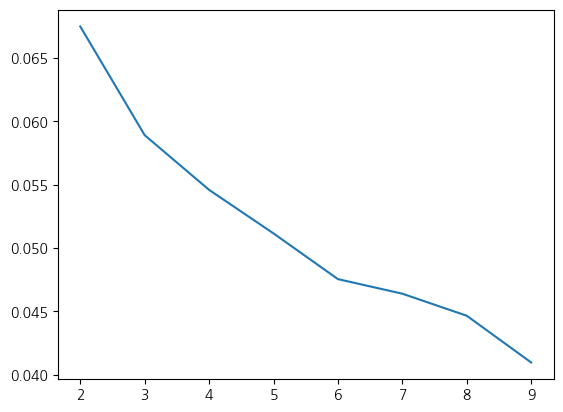

In [22]:
# 군집수 시뮬레이션
itr = []
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(pad_vectors)
    itr.append(km.inertia_)
    
plt.plot(range(2,10), itr)
plt.show()

In [60]:
# 2차원 배열 형태로 변환합니다.
X = np.array(pad_vectors)
# KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)

# 군집 결과를 확인합니다.
labels = kmeans.labels_
ddf['kmeans'] = labels

In [61]:
ddf['kmeans'].value_counts()

0    105
2     10
1      6
Name: kmeans, dtype: int64

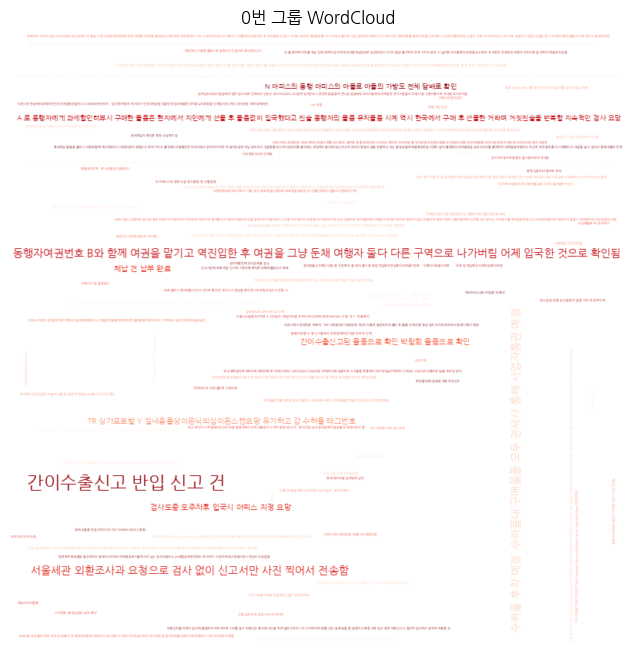

------------------------------------------------------------------------------------------


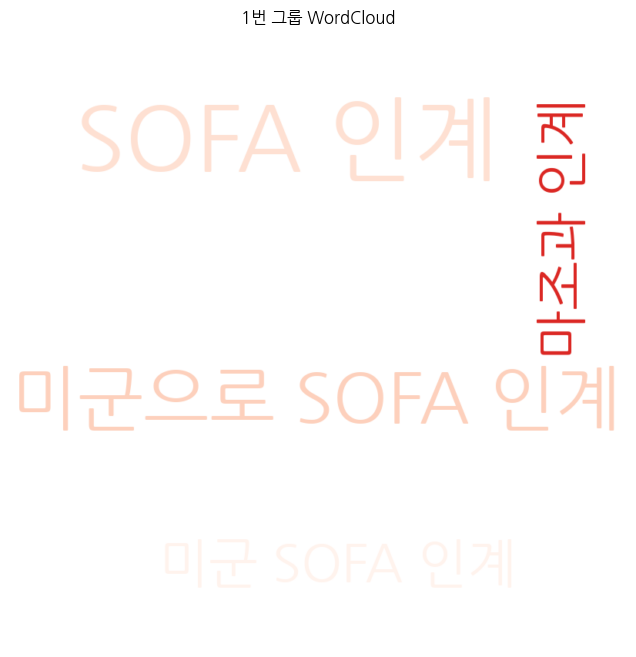

------------------------------------------------------------------------------------------


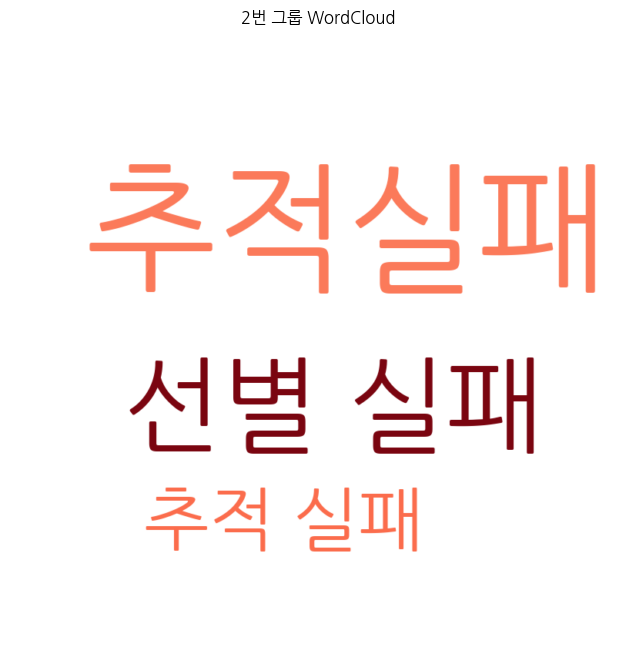

------------------------------------------------------------------------------------------


In [63]:
# 그룹별 워드클라우드 시각화
for i in range(ddf['kmeans'].max()+1):
    wordcloud(i,'kmeans')

In [53]:
# DBSCAN : 인접한 데이터를 클러스터링

X = np.array(pad_vectors) # Normalizer를 이용해 변환된 벡터
# eps 그룹핑할 최대 반경거리
# min_samples 그룹핑한 반경안의 최소 샘플 갯수
model = DBSCAN(eps=0.001,min_samples=3)

# 거리 계산 식으로는 Cosine distance를 이용
model.fit(X)
result = model.fit_predict(X)

In [54]:
ddf['dbscan'] = result

In [55]:
np.unique(ddf['dbscan'])

array([-1,  0,  1,  2])

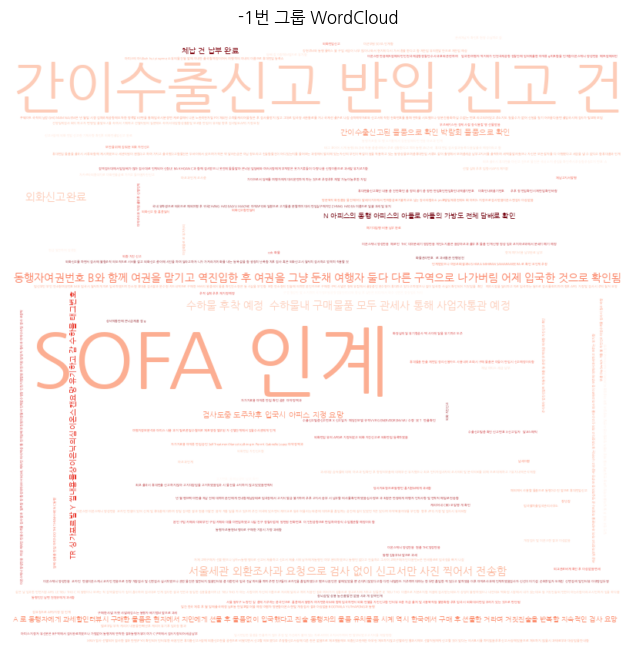

------------------------------------------------------------------------------------------


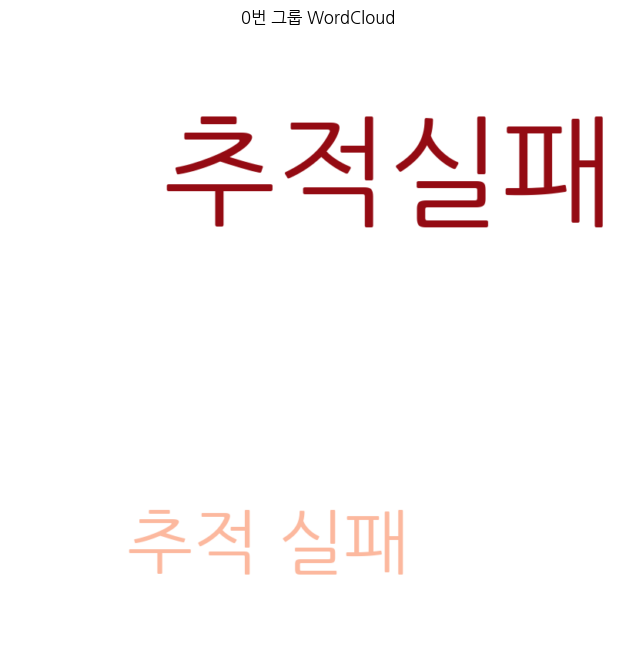

------------------------------------------------------------------------------------------


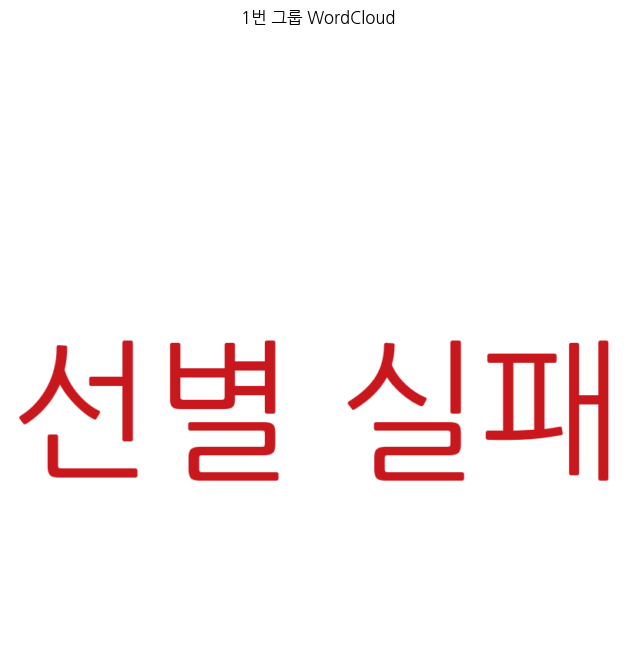

------------------------------------------------------------------------------------------


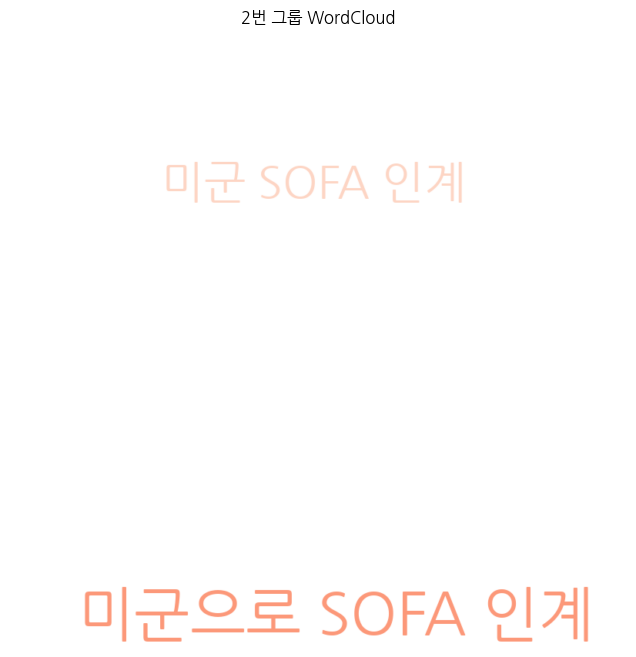

------------------------------------------------------------------------------------------


In [64]:
# 그룹별 워드클라우드 시각화
for i in range(-1, ddf['dbscan'].max()+1):
    wordcloud(i,'dbscan')

In [65]:
ddf.to_excel('./여행자휴대품검사결과_비지도결과.xlsx',index=False,engine='openpyxl')